# 

# Probability Distributions in R

In this chapter, we cover how to generate random samples in R from known
probability distributions and empirical distributions. Base R provides a
set of four functions for all common probability distributions. These
can be used to generate random samples and to calculate the
corresponding density, quantile, and cumulative functions that
correspond to that distribution.

In [ ]:
library(tidyverse)
library(HDSinRdata)

data(NHANESsample)

In the following code, we demonstrate an example of drawing random
samples. Anytime we perform an operation in R in which the outcome has
some randomness, we are using R’s random number generator under the
hood. This means that the results change every time we run our code. In
order to make sure our code is replicable, we have to set a *random
seed*, which makes the results the same every time. The `set.seed()`
function takes in a numeric seed value. You can use any number as the
seed. In the next code chunk, we first sample a random value from the
numbers 1 to 10 without setting a seed. Note that every time you run
this code chunk, the output can change. However, in the following code
chunk we set a seed, which means that the result is always the same (in
this case, it’s equal to 2).

In [ ]:
sample(1:10, 1)

[1] 2

In [ ]:
set.seed(5)
sample(1:10, 1)

[1] 2

## Probability Distribution Functions 

All of the common discrete (e.g., Bernoulli, binomial) and continuous
(e.g., normal, uniform, exponential, Poisson) probability distributions
have corresponding functions in R. For each of these distributions,
there are four available functions:

-   `r[dist]()`: random sample function for the given distribution
    (e.g., `rnorm()`, `runif()`)
-   `d[dist]()`: density function for the distribution (e.g., `dnorm()`,
    `dunif()`)
-   `p[dist]()`: cumulative distribution function for the distribution
    (e.g., `pnorm()`, `punif()`)
-   `q[dist]()`: quantile function for the distribution (e.g.,
    `qnorm()`, `qunif()`)

Let’s see how these work in practice, using the normal and binomial
distributions as examples.

### Random Samples   

The following code generates a sample of 100 random numbers following a
normal distribution with mean 5 and standard deviation 1. As you can
see, the function takes in `n` (the number of observations), `mean` (the
mean with default value 0), and `sd` (the standard deviation with
default value 1). A histogram plot (using the built-in `hist()`
function) shows that the generated values look roughly normally
distributed.

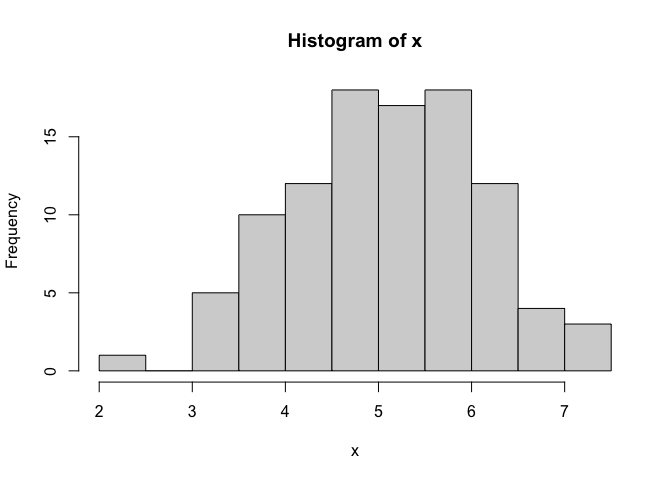

In [ ]:
x <- rnorm(n = 100, mean = 5, sd = 1)
hist(x)

We can also input a vector instead of a single value for the `mean` or
`sd` arguments if we want each sample to come from its own normal
distribution. As an example, we generate 100 random numbers with the
default standard deviation of 1 where half of the samples have a mean of
0, and the other half have a mean of 5.

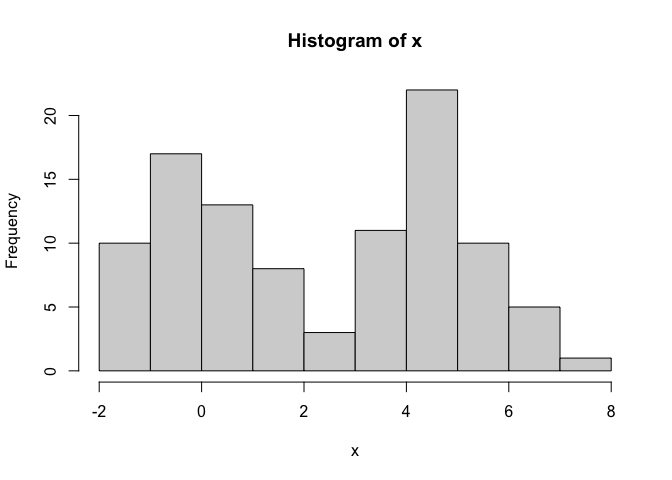

In [ ]:
x <- rnorm(n = 100, mean = rep(c(0,5), 50))
hist(x)

For the binomial distribution, the difference is that we need to specify
a probability `p` and number of trials `size` (rather than `mean` and
`sd` in the normal case) to specify the distribution. In the following
code, we generate 100 random numbers following a binomial distribution
with 10 trials and a probability 0.5.

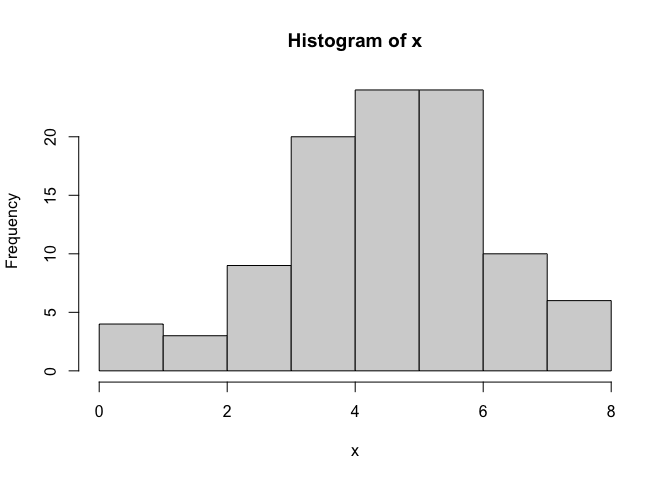

In [ ]:
x <- rbinom(n = 100, p = 0.5, size = 10)
hist(x)

We can also specify a different size or probability of success for each
sample. We repeat our sample but this time let the probability of
success be 0.25 for half of the sample and 0.75 for the other half.

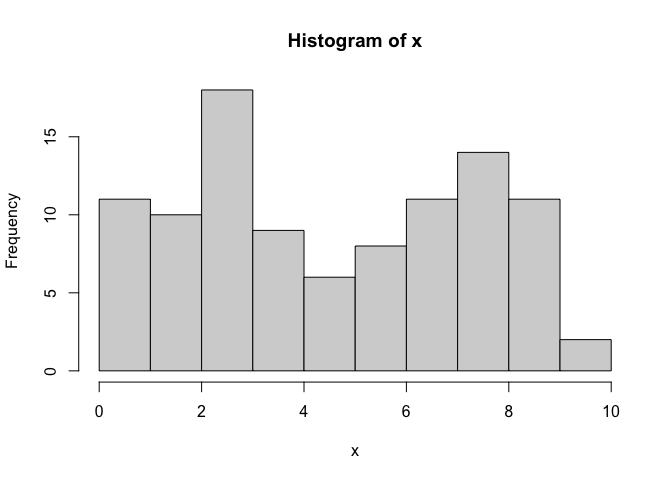

In [ ]:
x <- rbinom(n = 100, p = rep(c(0.25, 0.75), 50), size = 10)
hist(x)

### Density Function   

Next, we look at the density function. Recall that the probability
density function for a normal distribution with mean $\mu$ and standard
deviation $\sigma$ is given by the following formula.

$$ f_X(x) = \frac{1}{\sigma \sqrt{2 \pi}} \exp \left(-\frac{1}{2} \left (\frac{x-\mu}{\sigma} \right)^2 \right) $$

Using the following code, we can compare some of the values from the
`dnorm()` function to this equation and see that they are in fact equal.
We could also specify the mean and standard deviation in this function
but choose to use the default values (mean = 0 and sd = 1).

In [ ]:
dnorm(0) == 1/sqrt(2*pi)

[1] TRUE

[1] TRUE

[1] TRUE

If we wanted to find the density function for several values, we can
input a vector to this density function. In the following code, we find
the values of the density function for a normal distribution with mean 1
and standard deviation 2 for values `c(-1, 0, 1, 2, 3)`.

In [ ]:
dnorm(c(-1, 0, 1, 2, 3), mean = 1, sd = 2)

[1] 0.1209854 0.1760327 0.1994711 0.1760327 0.1209854

For the binomial distribution, `dbinom()` returns the probability of a
certain number of successes and corresponds to the probability density
function.

$$ P(X = x) = \binom{size}{x} p^x (1-p)^{size-x}. $$

For example, we can find the probability of getting exactly 3 heads from
10 coin flips, each with a probability of 0.5 for heads.

In [ ]:
dbinom(3, size = 10, p = 0.5)

[1] 0.1171875

While `dnorm()` allows us to specify any continuous values for $x$,
`dbinom()` gives us a warning if `x` contains non-integer values, since
the support of a binomial variable only includes integers.

In [ ]:
dbinom(2.4, size = 10, p = 0.5)

Warning in dbinom(2.4, size = 10, p = 0.5): non-integer x = 2.400000

[1] 0

We can also specify a vector for a distribution’s parameters to find the
distribution function for different distributions. For example, I find
the the probability density function for $X=4$ for the distribution with
$p=0.25$ and $p=0.5$.

In [ ]:
dbinom(4, size = 10, p = c(0.25, 0.5))

[1] 0.1459980 0.2050781

### Cumulative Distribution   

Next, we take a look at the cumulative distribution function. For the
normal distribution, the cumulative distribution is given by `pnorm()`,
which takes in a value `x`, a `mean`, and a `sd` and returns the
probability that a random variable following a $N(mean, sd)$
distribution is less than `x`. For example, for `x` equal to the mean,
this returns a 50% probability because the normal distribution is
symmetric with mean equal to the median. In the following code, we
verify this for two different values of the mean.

In [ ]:
pnorm(0)

[1] 0.5

[1] 0.5

Since the binomial distribution is discrete, it can only take on integer
values from 0 to `size`. This means that, for example, the `pbinom()`
function returns the same value for 3, 3.5, 3.6, all the way up to, but
not including, 4. This is because
$P(X \leq 3) = P(X \leq 3.2) = P(X \leq 3.5) = P(X \leq 3.6)$ and so on.
Note that here we passed in a vector of values `x`.

In [ ]:
pbinom(c(3, 3.5, 3.6, 4), size = 10, p = 0.5)

[1] 0.1718750 0.1718750 0.1718750 0.3769531

We can also vary the parameters for the distribution by passing a vector
for `size` and/or `p` to the cumulative distribution function. In the
subsequent code chunk, we find the probability that $X \leq 3$ and the
probability that $X \leq 4$ with 12 trials and a probability 0.25 and
with 10 trials and a probability 0.5.

In [ ]:
pbinom(c(3, 3, 4, 4), size = c(12, 10, 12, 10), 
       p=c(0.25, 0.5, 0.25, 0.5))

[1] 0.6487786 0.1718750 0.8423563 0.3769531

### Quantile Distribution   

Lastly, we have the quantile distribution function, which is the inverse
of the cumulative distribution function. This function takes in a
probability `x`, a `mean`, and a `sd` and returns the value for which
the cumulative distribution function is equal to `x`. Thus, when `x` is
equal to 0.5, the `qnorm()` function returns the median of the
distribution, which is equal to the mean for the normal distribution.

In [ ]:
qnorm(0.5)

[1] 0

[1] 5

For the discrete binomial distribution, the `qbinom()` function returns
the largest integer value for which the probability of being less than
or equal to that value is at most the inputted value x.

In [ ]:
qbinom(c(0.2, 0.3), size = 10, p = 0.5)

[1] 2 3

### Reference List for Probability Distributions 

In the previous examples, we only used the normal and binomial
distributions. The following list contains the other probability
distributions available in R. For each distribution, we have given the
arguments for the `r[dist]()` function. The other three functions have a
similar format. Unless otherwise stated, the parameter `n` is the number
of observations.

-   **Beta**: `rbeta(n, shape1, shape2, ncp = 0)` with shape parameters
    `shape1` and `shape2` (and optional non-centrality parameter `ncp`).
-   **Binomial**: `rbinom(n, size, prob)` with probability of success
    `prob` and number of trials `size`.
-   **Cauchy**: `rcauchy(n, location = 0, scale = 1)` with location
    parameter `location` and scale parameter `scale`.
-   **Chi-Square**: `rchisq(n, df, ncp = 0)` with `df` degrees of
    freedom and optional non-centrality parameter `ncp`.
-   **Exponential**: `rexp(n, rate = 1)` with rate `rate` (i.e., mean =
    1/rate).
-   **F**: `rf(n, df1, df2, ncp)` with `df1` and `df2` degrees of
    freedom (and optional non-centrality parameter `ncp`).
-   **Gamma**: `rgamma(n, shape, rate = 1, scale = 1/rate)` with
    parameters `shape` and `scale` (or alternatively specified by
    `rate`).
-   **Geometric**: `rgeom(n, prob)` with probability parameter `prob`.
-   **Hypergeometric**: `rhyper(nn, m, n, k)` with `m` white balls, `n`
    black balls, and `k` balls chosen.
-   **Logistic**: `rlogis(n, location = 0, scale = 1)` with parameters
    `location` and `scale`.
-   **Log Normal**: `rlnorm(n, meanlog = 0, sdlog = 1)` with mean
    `meanlog` and standard deviation `sdlog` on the log scale.
-   **Negative Binomial**: `rnbinom(n, size, prob, mu)` with parameters
    `size` and `prob`.
-   **Normal**: `rnorm(n, mean = 0, sd = 1)` with mean equal to `mean`
    and standard deviation equal to `sd`.
-   **Poisson**: `rpois(n, lambda)` with parameter `lambda`.
-   **Student t**: `rt(n, df, ncp)` with `df` degrees of freedom (and
    optional non-centrality parameter `ncp`).
-   **Uniform**: `runif(n, min = 0, max = 1)` with minimum value `min`
    and maximum value `max`.
-   **Weibull**: `rweibull(n, shape, scale = 1)` with parameters `shape`
    and `scale`.
-   **Wilcoxon Rank Sum**: `rwilcox(nn, m, n)` with `nn` number of
    observations and sample sizes `m` and `n`.
-   **Wilcoxon Signed Rank**: `rsignrank(nn, n)` with `nn` number of
    observations and sample size `n`.

### Practice Question

Set the random seed to be `123`, and then generate 5 random numbers
following a uniform distribution with min 1 and max 5. Then, find the
0.15 quantile for this same distribution (it should be equal to 1.6).

In [ ]:
# Insert your solution here:

## Empirical Distributions and Sampling Data  

At the start of this chapter, we used the `sample()` function. This
function can also be used to sample from an empirical distribution. The
`sample(x, size, replace=FALSE, prob=NULL)` function takes in the values
we want to sample from `x`, the number of observations we want to sample
`size`, and whether we want to sample with replacement `replace`. If we
don’t want to sample such that each value has an equal probability of
being chosen, we can also set a probability vector `prob`, which must
have the same length as `x`. In the following code, we sample 500 rows
without replacement from the `NHANESsample` data. To do so, we select
500 values from the indices 1 to the number of rows in the data. We then
select rows of the data using these indices.

In [ ]:
nhanes_sample_ids <- sample(1:nrow(NHANESsample), 500, replace = FALSE)
nhanes_sample <- NHANESsample[nhanes_sample_ids, ]
dim(nhanes_sample)

[1] 500  21

We now demonstrate sampling with replacement. By doing so, we create a
new dataset that is sampled from the empirical distribution of the data
and that is called a *bootstrap sample*.

In [ ]:
nhanes_sample_ids <- sample(1:nrow(NHANESsample), nrow(NHANESsample), 
                            replace = TRUE)
nhanes_sample <- NHANESsample[nhanes_sample_ids, ]
dim(nhanes_sample)

[1] 31265    21

Another way to sample from a data frame is to use the `slice_sample()`
function from the **tidyverse**. In this function, we can either specify
the number of observations to sample `n` or the proportion of
observations to sample `prop`. Additionally, we can sample with or
without replacement by setting the value of the argument `replace` (with
default value FALSE). We use this function to randomly sample 20% of
observations without replacement.

In [ ]:
nhanes_sample <- NHANESsample %>%
  slice_sample(prop = 0.2, replace = FALSE)
dim(nhanes_sample)

[1] 6253   21

### Practice Question

Set the random seed to `5` and then sample 50 observations with
replacement from the set of integers from 1 to 100. Take the mean of
those observations; it should be 56.7.

In [ ]:
# Insert your solution here:

Beyond sampling, we can also find the empirical cumulative distribution.
That is, we can use a given vector to infer a distribution. In the
following case, we draw a random sample from a normal distribution `vec`
and then find its empirical cumulative distribution using the `ecdf()`
function. This function actually returns a function, which can then be
used to find the sample cumulative distribution for different values
similar to the `p[dist]()` functions. In our example, we find the sample
probability that $X \leq 0$.

In [ ]:
vec <- rnorm(100) 
ecdf_vec <- ecdf(vec)
ecdf_vec(0)

[1] 0.63

We now plot this empirical distribution against the actual cdf using the
`pnorm()` function. Note that in order to do so, we create a sequence of
possible `x` values to pass to both `pnorm()` and `ecdf_vec()`.

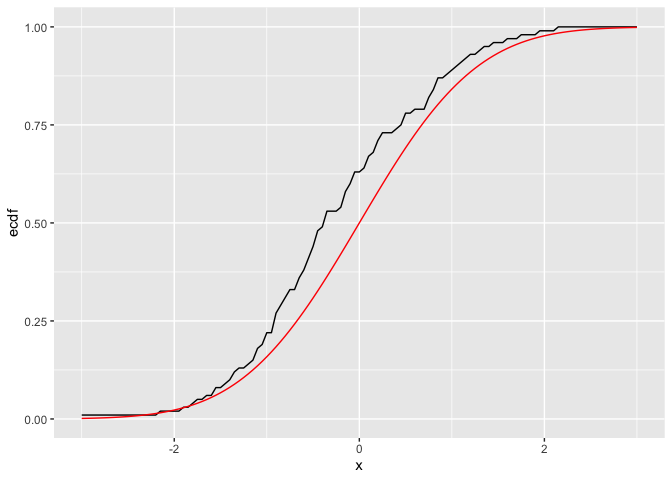

In [ ]:
df <- data.frame(x = seq(-3, 3, 0.05))
df$ecdf <- ecdf_vec(df$x)
df$distn = pnorm(df$x)

ggplot(df) + 
  geom_line(aes(x = x, y = ecdf), color = "black") + 
  geom_line(aes(x = x, y= distn), color = "red") 

In practice, the empirical cumulative distribution might involve data
from a given dataset that you want to use to represent the population’s
distribution. As an example, in the following code we find the empirical
distribution of blood lead level from the `NHANESsample` data frame. A
blood lead level of 5 µg/dL or above is considered elevated. We can see
96.4% of observations have a blood lead level below this threshold.

In [ ]:
ecdf_lead <- ecdf(nhanes_sample$LEAD)
ecdf_lead(5)

[1] 0.9609787

## Exercises

1.  Assume the distribution of female heights is approximated by a
    normal distribution with a mean of 64 inches and a standard
    deviation of 2.2 inches. Using this distribution, answer the
    following questions.

    -   What is the probability that a randomly chosen female is 5 feet
        or shorter?

    -   What is the probability that a randomly chosen female is 6 feet
        or taller?

    -   Generate 500 random observations following this distribution and
        find the sample 0.15 quantile. Then, compare this to the 0.15
        quantile using the `qdist()` function.

2.  Compute the probability that the height of a randomly chosen female
    is within 1 SD from the average height.

3.  Create a vector of 100 patient IDs, and then use the `sample()`
    function to assign half of them to a treatment group and the other
    half to a control group. Then, suppose those in the control group
    have a reduction in viral load distributed as
    $X \sim 100*exp(mean = V)$, where $V$ follows a uniform distribution
    between 1 and 2, whereas those who are in the treatment group have a
    reduction in viral load distributed as $X \sim 100*exp(mean = 3)$.
    Plot distributions of reduction in viral load for both groups.